In [12]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
data = pd.read_csv('forestfires.csv')

# Assuming that the data might contain missing values, we handle them by removing
data = data.dropna()

# Handling outliers
# We can use the z-score to identify and remove outliers from 'area'
z_scores = stats.zscore(data['area'])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3)
data = data[filtered_entries]

# Convert 'month' and 'day' to numeric values using label encoding or one-hot encoding
# Here we will do one-hot encoding
data = pd.get_dummies(data)

# Save original month and day for visualization
months = data['month']
days = data['day']

# Select specific columns for the correlation analysis
selected_columns = ['X', 'Y', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH', 'wind', 'rain', 'area']
data_selected = data[selected_columns]

# Splitting the dataset into features and target variable
X = data_selected.drop(['area'], axis=1)
y = data_selected['area']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Parameter grid for Random Forest
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

# Parameter grid for Gradient Boosting
gb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10]
}

# Grid search for Random Forest
rf_grid_search = GridSearchCV(RandomForestRegressor(random_state=42), rf_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
rf_grid_search.fit(X_train, y_train)
rf_best_model = rf_grid_search.best_estimator_

# Grid search for Gradient Boosting
gb_grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), gb_param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
gb_grid_search.fit(X_train, y_train)
gb_best_model = gb_grid_search.best_estimator_

# Predictions with the best models
rf_best_pred = rf_best_model.predict(X_test)
gb_best_pred = gb_best_model.predict(X_test)

# Calculate new MSE and RMSE
rf_best_mse = mean_squared_error(y_test, rf_best_pred)
rf_best_rmse = np.sqrt(rf_best_mse)
gb_best_mse = mean_squared_error(y_test, gb_best_pred)
gb_best_rmse = np.sqrt(gb_best_mse)

# Print out the new MSE and RMSE
print("Best Random Forest MSE:", rf_best_mse)
print("Best Random Forest RMSE:", rf_best_rmse)
print("Best Gradient Boosting MSE:", gb_best_mse)
print("Best Gradient Boosting RMSE:", gb_best_rmse)


# Set the aesthetic style of the plots
sns.set_style('whitegrid')

# Histogram of the target variable - area
plt.figure(figsize=(10, 6))
sns.histplot(data['area'], bins=30, kde=True)
plt.title('Distribution of Burned Area')
plt.xlabel('Area (ha)')
plt.ylabel('Frequency')
plt.show()

# Count plot for the number of fires per month
plt.figure(figsize=(12, 6))
sns.countplot(x='month', data=data, order=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
plt.title('Count of Fires per Month')
plt.xlabel('Month')
plt.ylabel('Number of Fires')
plt.show()

# Count plot for the number of fires per day of the week
plt.figure(figsize=(12, 6))
sns.countplot(x='day', data=data, order=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
plt.title('Count of Fires per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Fires')
plt.show()




NameError: name 'stats' is not defined

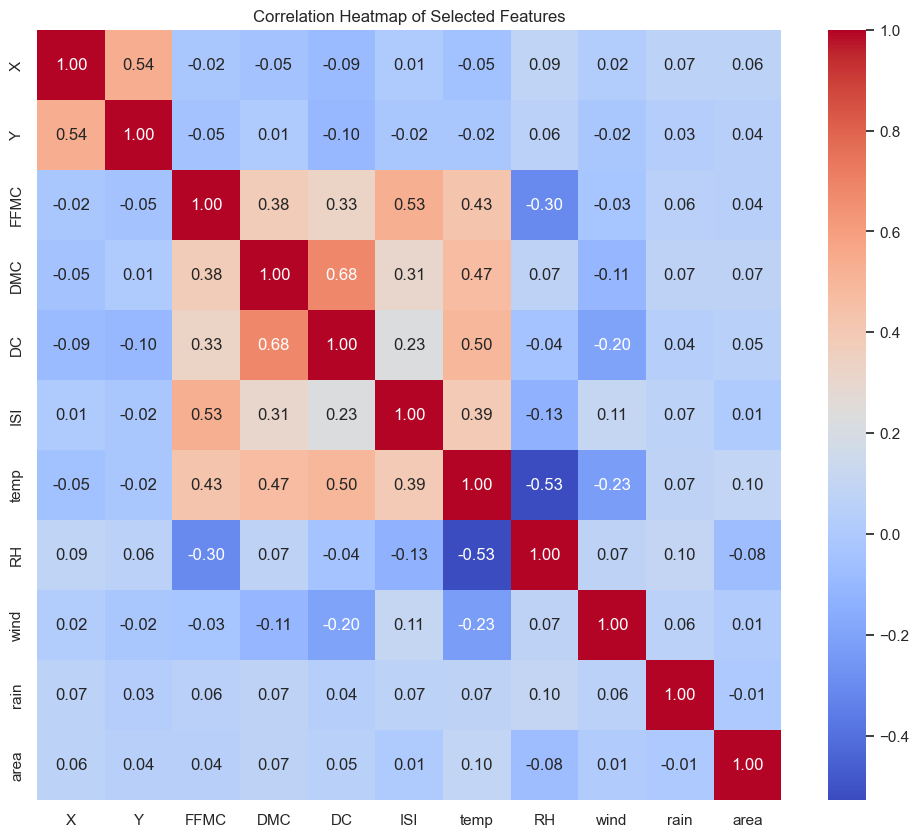

In [11]:
# Correlation heatmap of the selected features
plt.figure(figsize=(12, 10))
sns.heatmap(data_selected.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Selected Features')
plt.show()
